# Module 4b - Multidimensionality - Digits dataset


The digits dataset consists of 8x8 pixel images of digits.  
The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

There is ten numbers, ten labels or classes. It's no more binary as the Wisconsin dataset.

| Feature  | Value |
| ------------- | ------------- |
| Classes            | 10 |
| Samples per class  | ~180  |
| Samples total      | 1797 |
| Dimensionality     | 64 |

* [One digit](#One-digit)
* [A larget set of digits](#A-larger-set)
* [PCA](#PCA)
* [T-sne](#T-sne)

## One-digit

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

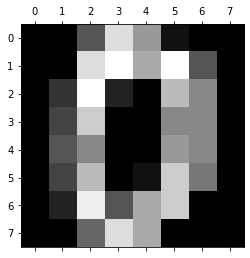

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

#########################################################
################   Digits Data Set      #################
#########################################################

from sklearn.datasets import load_digits


digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
print(digits.images[0])


## A-larger-set

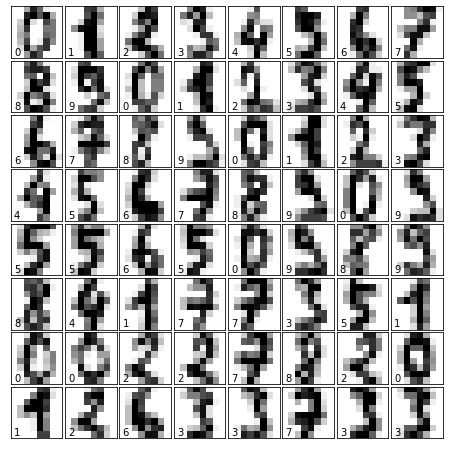

<Figure size 432x288 with 0 Axes>

In [5]:

# Plot a bigger subset

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
plt.show()
plt.clf()




# PCA

I'm not an expert of PCA. But there is [elsewhere, yeah i know it's in R](https://aedin.github.io/PCAworkshop/index.html).
You just must know that there is some variations...



Running PCA ...
Explained variance: 0.8943
Individual variance contributions:
0.14890593584063527
0.13618771239635333
0.1179459376397439
0.08409979421005903
0.05782414663587801
0.04916910316416612
0.04315986993977622
0.036613725532561855
0.03353247972300185
0.03078806088337525
0.023723387800562122
0.0227269619497839
0.01821857186727183
0.017738505819698294
0.014669838917972675
0.01409693400572796
0.013185569159334607
0.01248069488969031
0.010172900205828332
0.009051306097887653


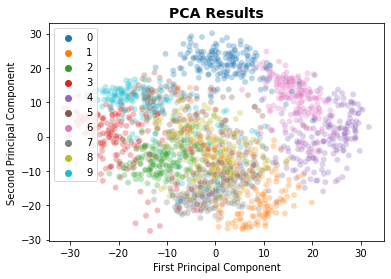

In [7]:

#plt.savefig('./figure/images.png', dpi=300)

#################### 1. PCA  ########################

n_comp = 20
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp,  random_state=1001)
# Perform PCA
X_pca = pca.fit_transform(digits.data)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

sns.scatterplot(x= X_pca[:, 0], y = X_pca[:, 1], hue = digits.target,
palette = sns.color_palette("tab10"), alpha=0.3) 

plt.title('PCA Results',weight='bold').set_fontsize('14') 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')
plt.show()
#plt.savefig('./figure/PCA.Cancer.png', dpi=300)
plt.clf()
plt.close()




## T-sne

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. 

Parameters here might be very important here. 
perplexity= generally between 5 to 30
random_state is here to reproduce the result.

Sometimes when you have huge dataset. You can do PCA and then incorporate the first 10 components of the PCA result...(can be more, 30 is generally in single cells experiment for example).


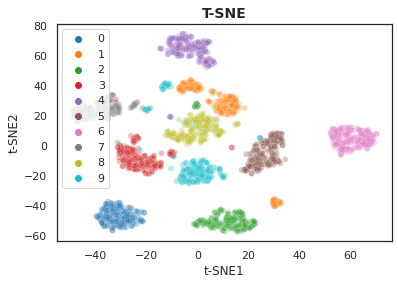

In [8]:
#################### 2. T-Snee ########################
# https://distill.pub/2016/misread-tsne/

tsne_model = TSNE(n_components=2, perplexity=30, random_state=2020)
# Perform t-SNE
embed = tsne_model.fit_transform(digits.data)

sns.set_style("white")

sns.scatterplot(x= embed[:, 0], y = embed[:, 1], hue = digits.target,
palette= sns.color_palette("tab10"), alpha = 0.3) 

plt.title('T-SNE',weight='bold').set_fontsize('14') 
plt.xlabel('t-SNE1') 
plt.ylabel('t-SNE2')
plt.show()
#plt.savefig('./figure/Tsnee.Scaled.Cancer.png', dpi=300)
plt.clf()
plt.close()
exit()
